In [1]:
import sys
import os
import pandas as pd

DATA_DIR_TRIVIA = 'data/triviaqa-unfiltered/'
DATA_DIR_HOTPOT = 'data/hotpotqa-fullwiki/'
DATA_DIR_GOOGLE = 'data/google-natural-questions/'
DATA_DIR_ASKME = 'data/askme-qa/'

trivia_ngrams_df = pd.read_csv(DATA_DIR_TRIVIA + 'ngrams-sorted.csv')
hotpot_ngrams_df = pd.read_csv(DATA_DIR_HOTPOT + 'ngrams-sorted.csv')
google_ngrams_df = pd.read_csv(DATA_DIR_GOOGLE + 'ngrams-sorted.csv')
askme_10k_ngrams_df = pd.read_csv(DATA_DIR_ASKME + 'ngrams-sorted-10k.csv')
askme_full_ngrams_df = pd.read_csv(DATA_DIR_ASKME + 'ngrams-sorted-full.csv')

In [14]:
from lib.ngrams import calculate_ratios
import matplotlib.pyplot as plt

n_values = list(range(1, 9))
k_values = [4, 8, 16, 32, 64, 128]

datasets = {
    'TriviaQA': trivia_ngrams_df,
    'HotpotQA': hotpot_ngrams_df,
    'Google NQ': google_ngrams_df,
    'AskMe-10k': askme_10k_ngrams_df,
    'AskMe-Full': askme_full_ngrams_df
}

all_ratios = {}
top_1_percent_data = {}

for name, df in datasets.items():
    ratios, top_1_percent_ratios, total_counts = calculate_ratios(df, n_values, k_values)
    ratios['Top 1%'] = top_1_percent_ratios
    ratios['Total Count'] = total_counts
    all_ratios[name] = ratios
    top_1_percent_data[name] = top_1_percent_ratios

ratio_df_list = []
for dataset, ratios in all_ratios.items():
    ratio_df = pd.DataFrame(ratios, index=[f'{n}-gram' for n in n_values])
    ratio_df['Dataset'] = dataset
    ratio_df_list.append(ratio_df)

combined_df = pd.concat(ratio_df_list)

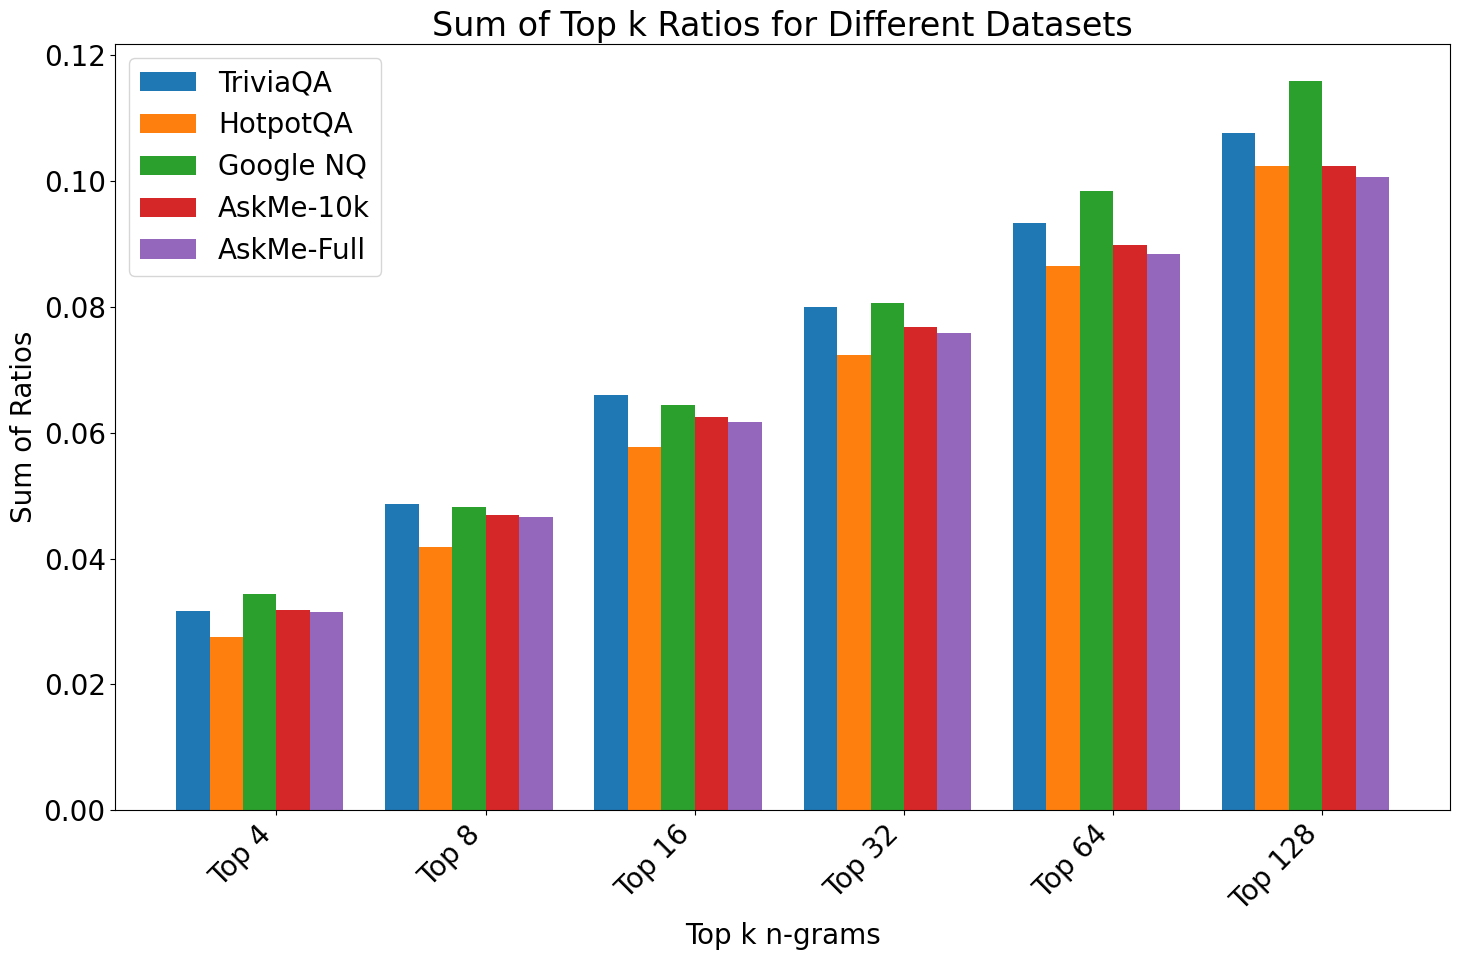

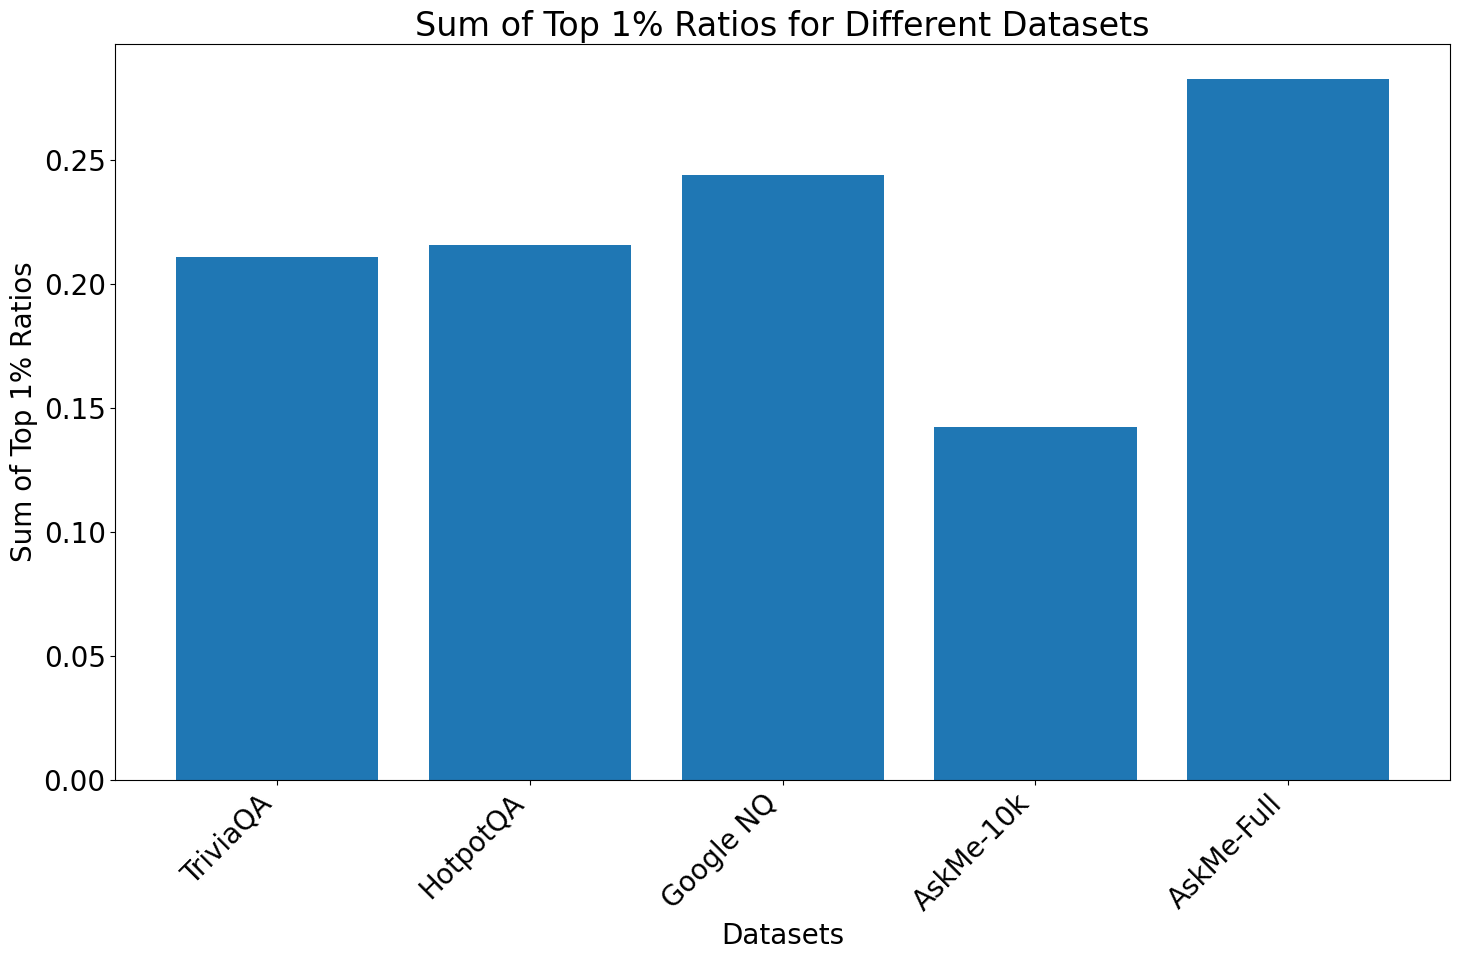

In [15]:
plot_data = []
labels = []
for k in k_values:
    for dataset in datasets.keys():
        mean_value = combined_df[combined_df['Dataset'] == dataset][k].mean()
        plot_data.append(mean_value)
        labels.append(f'{k} ({dataset})')

plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.8 / len(datasets)
index = list(range(len(k_values)))

for i, dataset in enumerate(datasets.keys()):
    start_index = i * bar_width
    bar_positions = [x + start_index for x in index]
    dataset_values = plot_data[i::len(datasets)]
    ax.bar(bar_positions, dataset_values, bar_width, label=dataset)

ax.set_xticks([r + bar_width * (len(datasets) / 2) for r in index])
ax.set_xticklabels([f'Top {k}' for k in k_values])
ax.set_xlabel('Top k n-grams')
ax.set_ylabel('Sum of Ratios')
ax.set_title('Sum of Top k Ratios for Different Datasets')
ax.legend()

plt.rcParams.update({'font.size': 20})

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(15, 10))
top_1_percent_means = {dataset: sum(ratios) / len(ratios) for dataset, ratios in top_1_percent_data.items()}
datasets = list(top_1_percent_means.keys())
values = list(top_1_percent_means.values())
ax.bar(datasets, values)
ax.set_xlabel('Datasets')
ax.set_ylabel('Sum of Top 1% Ratios')
ax.set_title('Sum of Top 1% Ratios for Different Datasets')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()